# Lights

This test showcases various light sources supported by Lightmetrica. We render images using `renderer::pt`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lmenv
env = lmenv.load('.lmenv')

In [3]:
import os
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import lightmetrica as lm
%load_ext lightmetrica_jupyter
import lmscene

In [4]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()
lm.comp.load_plugin(os.path.join(env.bin_path, 'accel_embree'))
if not lm.Release:
    lm.parallel.init('openmp', num_threads=1)
    lm.debug.attach_to_debugger()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64
[I|0.000] Loading plugin [name='accel_embree']
[I|0.001] .. Successfully loaded [name='accel_embree']


In [5]:
def render(scene, name, **kwargs):
    w = 854
    h = 480
    film = lm.load_film('film', 'bitmap', w=w, h=h)
    renderer = lm.load_renderer('renderer', name,
        scene=scene,
        output=film,
        max_verts=20,
        scheduler='time',
        render_time=10,
        **kwargs)
    renderer.render()
    return np.copy(film.buffer())

def display_image(img, fig_size=15, scale=1):
    f = plt.figure(figsize=(fig_size,fig_size))
    ax = f.add_subplot(111)                                                                                                                                                
    ax.imshow(np.clip(np.power(img*scale,1/2.2),0,1), origin='lower')
    ax.axis('off')
    plt.show()

## Scene setup

In [6]:
accel = lm.load_accel('accel', 'embree')
scene = lm.load_scene('scene', 'default', accel=accel)
mat = lm.load_material('mat_ut', 'glossy', Ks=[.8,.2,.2], ax=0.1, ay=0.1)

[I|0.033] Loading asset [name='accel']
[I|0.034] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|0.034] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|0.034] Loading asset [name='scene']
[I|0.034] Loading asset [name='mat_ut']


## Rendering

### Area light

``light::area``

[I|0.050] Loading asset [name='camera_main']
[I|0.050] Loading asset [name='model_obj']
[I|0.050] .. Loading OBJ file [path='bunny_with_planes.obj']
[I|0.193] Loading asset [name='mat_diffuse_white']
[I|0.193] Loading asset [name='tex_floor']
[I|0.193] .. Loading texture [path='default.png']
[I|0.194] Loading asset [name='mat_floor']
[I|0.194] Loading asset [name='mat_black']
[I|0.194] Loading asset [name='light']
[I|0.198] Building acceleration structure [name='accel']
[I|0.198] .. Flattening scene


[I|0.205] .. Building


[I|0.256] Loading asset [name='film']
[I|0.272] Loading asset [name='renderer']


  0%|          | 0/10.0 [00:00<?, ?it/s]

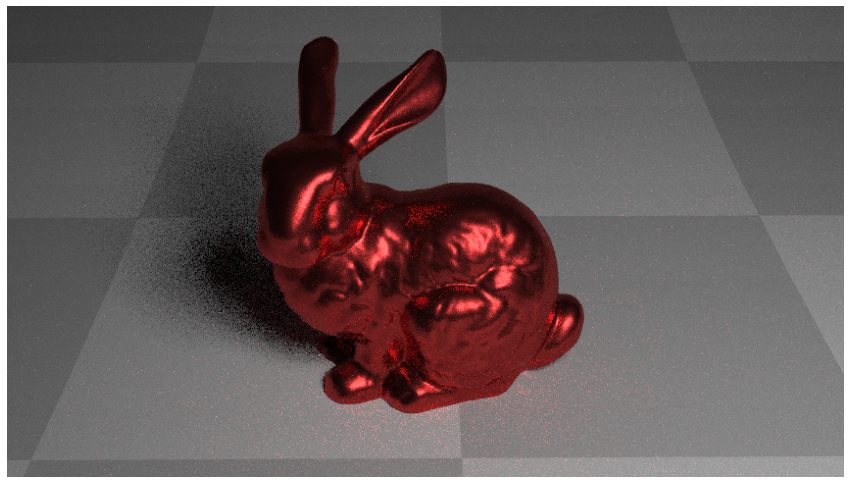

In [7]:
scene.reset()
lmscene.bunny_with_area_light(scene, env.scene_path, mat_knob=mat.loc())
scene.build()
img = render(scene, 'pt')
display_image(img)

### Environment light

`light::env` `light::envconst`

[I|11.633] Loading asset [name='camera_main']
[I|11.634] .. Asset [name='camera_main'] has been already loaded. Replacing..
[I|11.634] Loading asset [name='model_obj']
[I|11.634] .. Asset [name='model_obj'] has been already loaded. Replacing..
[I|11.634] .. Loading OBJ file [path='bunny_with_planes.obj']
[I|11.770] Loading asset [name='mat_diffuse_white']
[I|11.771] .. Asset [name='mat_diffuse_white'] has been already loaded. Replacing..
[I|11.771] Loading asset [name='tex_floor']
[I|11.771] .. Asset [name='tex_floor'] has been already loaded. Replacing..
[I|11.771] .. Loading texture [path='default.png']
[I|11.772] Loading asset [name='mat_floor']
[I|11.773] .. Asset [name='mat_floor'] has been already loaded. Replacing..
[I|11.773] Loading asset [name='light_env']
[I|11.773] .. Loading texture [path='flower_road_1k.hdr']
[I|11.805] Building acceleration structure [name='accel']
[I|11.805] .. Flattening scene
[I|11.810] .. Building
[I|11.857] Loading asset [name='film']
[I|11.857] .. 

  0%|          | 0/10.0 [00:00<?, ?it/s]

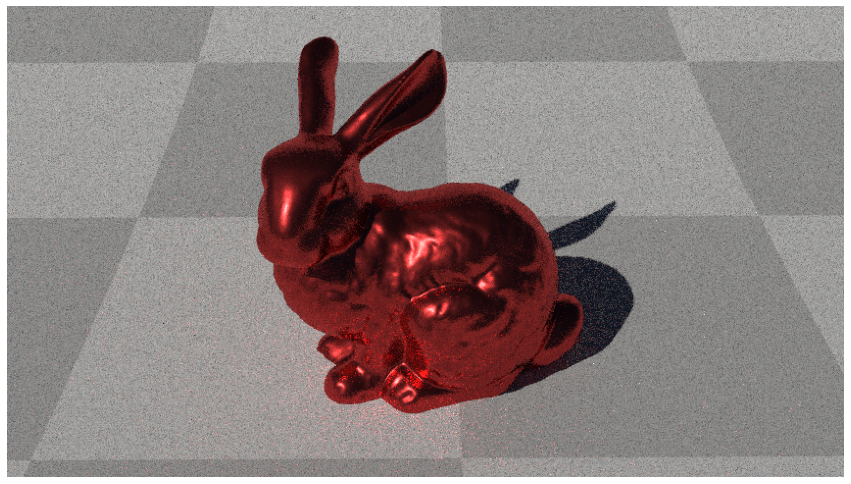

In [8]:
scene.reset()
lmscene.bunny_with_env_light(
    scene, env.scene_path,
    mat_knob=mat.loc(),
    path=os.path.join(env.scene_path, 'flower_road_1k.hdr'),
    rot=90,
    flip=False,
    scale=0.1)
scene.build()
img = render(scene, 'pt')
display_image(img)

### Point light

`light::point`

[I|22.832] Loading asset [name='camera_main']
[I|22.832] .. Asset [name='camera_main'] has been already loaded. Replacing..
[I|22.832] Loading asset [name='model_obj']
[I|22.833] .. Asset [name='model_obj'] has been already loaded. Replacing..
[I|22.833] .. Loading OBJ file [path='bunny_with_planes.obj']
[I|22.967] Loading asset [name='mat_diffuse_white']
[I|22.967] .. Asset [name='mat_diffuse_white'] has been already loaded. Replacing..
[I|22.968] Loading asset [name='tex_floor']
[I|22.968] .. Asset [name='tex_floor'] has been already loaded. Replacing..
[I|22.968] .. Loading texture [path='default.png']
[I|22.968] Loading asset [name='mat_floor']
[I|22.969] .. Asset [name='mat_floor'] has been already loaded. Replacing..
[I|22.969] Loading asset [name='light_point']
[I|22.972] Building acceleration structure [name='accel']
[I|22.973] .. Flattening scene
[I|22.977] .. Building
[I|23.022] Loading asset [name='film']
[I|23.022] .. Asset [name='film'] has been already loaded. Replacing..

  0%|          | 0/10.0 [00:00<?, ?it/s]

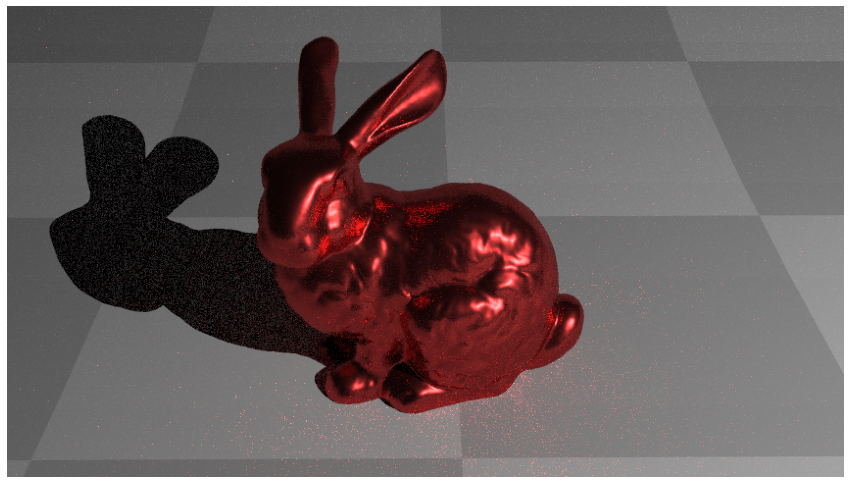

In [9]:
scene.reset()
lmscene.bunny_with_point_light(scene, env.scene_path, mat_knob=mat.loc())
scene.build()
img = render(scene, 'pt')
display_image(img)

### Directional light

`light::directional`

[I|34.129] Loading asset [name='camera_main']
[I|34.129] .. Asset [name='camera_main'] has been already loaded. Replacing..
[I|34.129] Loading asset [name='model_obj']
[I|34.129] .. Asset [name='model_obj'] has been already loaded. Replacing..
[I|34.129] .. Loading OBJ file [path='bunny_with_planes.obj']
[I|34.264] Loading asset [name='mat_diffuse_white']
[I|34.264] .. Asset [name='mat_diffuse_white'] has been already loaded. Replacing..
[I|34.264] Loading asset [name='tex_floor']
[I|34.264] .. Asset [name='tex_floor'] has been already loaded. Replacing..
[I|34.264] .. Loading texture [path='default.png']
[I|34.265] Loading asset [name='mat_floor']
[I|34.265] .. Asset [name='mat_floor'] has been already loaded. Replacing..
[I|34.265] Loading asset [name='light_directional']
[I|34.269] Building acceleration structure [name='accel']
[I|34.269] .. Flattening scene
[I|34.273] .. Building
[I|34.318] Loading asset [name='film']
[I|34.318] .. Asset [name='film'] has been already loaded. Repla

  0%|          | 0/10.0 [00:00<?, ?it/s]

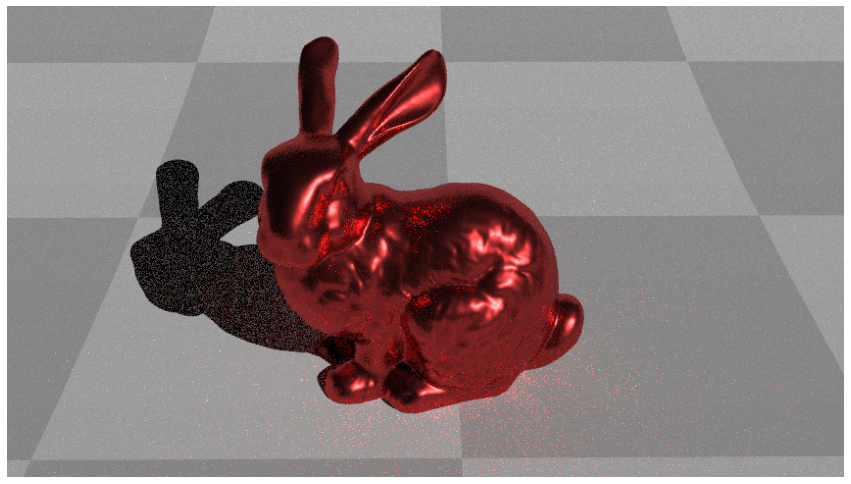

In [10]:
scene.reset()
lmscene.bunny_with_directional_light(scene, env.scene_path, mat_knob=mat.loc())
scene.build()
img = render(scene, 'pt')
display_image(img)